In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

### Model

In [2]:
class CnnTs(nn.Module):

    def __init__(self):
        super(Cnn1d, self).__init__()
        # [10,1,262144]
        self.conv_1 = nn.Conv1d(in_channels=1, out_channels=6,
                                kernel_size=3, padding=1)
        # [10,6,262144]
        self.maxpool = nn.MaxPool1d(kernel_size=2)
        # [10,6,131072]
        self.conv_2 = nn.Conv1d(in_channels=6, out_channels=16,
                                kernel_size=3, padding=1)
        # [10,16,131072]
        # After pooling : [10,16,65536]
        self.full_connect_1 = nn.Linear(16*65536, 500)
        self.full_connect_2 = nn.Linear(500, 100)
        self.full_connect_3 = nn.Linear(100, 1)

    def forward(self, input):
        input = self.maxpool(F.relu(self.conv_1(input)))
        input = self.maxpool(F.relu(self.conv_2(input)))
        input = input.view(1, 16*250)
        input = F.relu(self.full_connect_1(input))
        input = F.relu(self.full_connect_2(input))
        input = F.relu(self.full_connect_3(input))
        return input

### Dataset

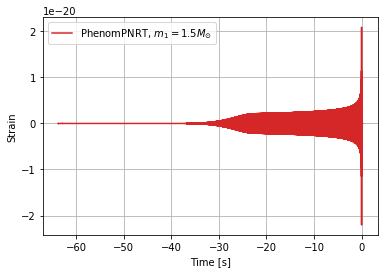

In [3]:
path = "waveforms/phenom/"
model_files = os.listdir(path)
list_ts, list_m1 = [], []
for file in model_files:
    timeseries = np.load(path + file).T
    m1 = float(file[14:17]) # /!\ Depends on the name of the file
    list_ts.append(timeseries[1])
    list_m1.append(m1)

train_x = torch.Tensor(list_ts).unsqueeze(1) # [10, 1, 262144]
train_y = torch.Tensor(list_m1) # [10]

trainset = TensorDataset(train_x, train_y)
trainloader = DataLoader(trainset, batch_size=10)

fig, ax = plt.subplots()
t = np.load("waveforms/phenom/phenomPNRT_M1=1.50M0.npy").T[0]
hp = np.load("waveforms/phenom/phenomPNRT_M1=1.50M0.npy").T[1]
ax.plot(t, hp, c="tab:red", label=r"PhenomPNRT, $m_1=1.5M_{\odot}$")
ax.set(xlabel="Time [s]", ylabel="Strain")
ax.grid()
ax.legend()